Initial cost : 30.79495785534583
J : 30.631191618016278
J : 30.46840650421456
J : 30.306596636029628
J : 30.145756170764997
J : 29.98587930072776
J : 29.826960253018918
J : 29.668993289324902
J : 29.511972705710377
J : 29.355892832412287
J : 29.200748033635126
J : 29.04653270734744
J : 28.893241285079533
J : 28.740868231722445
J : 28.589408045328017
J : 28.43885525691028
J : 28.289204430247942
J : 28.140450161688154
J : 27.992587079951296
J : 27.845609845937123
J : 27.69951315253194
J : 27.55429172441694
J : 27.409940317877776
J : 27.266453720615193
J : 27.123826751556805
J : 26.982054260670044
J : 26.84113112877619
J : 26.701052267365515
J : 26.561812618413548
J : 26.42340715419845
J : 26.28583087711947
J : 26.14907881951646
J : 26.013146043490565
J : 25.878027640725833
J : 25.74371873231206
J : 25.6102144685686
J : 25.477510028869226
J : 25.345600621468087
J : 25.214481483326693
J : 25.0841478799419
J : 24.95459510517499
J : 24.825818481081704
J : 24.697813357743364
J : 24.5705751130

J : 4.906986274978481
J : 4.898314875386905
J : 4.88969542615028
J : 4.881127616034034
J : 4.872611135668193
J : 4.864145677536223
J : 4.8557309359639245
J : 4.847366607108384
J : 4.839052388947017
J : 4.830787981266655
J : 4.822573085652707
J : 4.814407405478381
J : 4.80629064589398
J : 4.798222513816247
J : 4.790202717917794
J : 4.7822309686165685
J : 4.774306978065406
J : 4.7664304601416365
J : 4.758601130436746
J : 4.75081870624612
J : 4.743082906558819
J : 4.735393452047444
J : 4.727750065058047
J : 4.720152469600103
J : 4.712600391336551
J : 4.705093557573872
J : 4.697631697252266
J : 4.690214540935848
J : 4.6828418208029206
J : 4.67551327063631
J : 4.6682286258137475
J : 4.6609876232983165
J : 4.653790001628956
J : 4.646635500911017
J : 4.639523862806879
J : 4.632454830526623
J : 4.625428148818757
J : 4.618443563961003
J : 4.611500823751133
J : 4.604599677497859
J : 4.597739876011789
J : 4.590921171596422
J : 4.584143318039208
J : 4.577406070602654
J : 4.570709186015494
J : 4.56

J : 3.5296159880404483
J : 3.529196413837918
J : 3.5287793533044347
J : 3.528364791380607
J : 3.527952713097266
J : 3.52754310357492
J : 3.527135948023222
J : 3.5267312317404347
J : 3.526328940112897
J : 3.5259290586145
J : 3.52553157280616
J : 3.5251364683352975
J : 3.5247437309353202
J : 3.524353346425106
J : 3.5239653007084932
J : 3.5235795797737675
J : 3.5231961696931635
J : 3.522815056622351
J : 3.5224362267999467
J : 3.522059666547007
J : 3.521685362266544
J : 3.521313300443025
J : 3.5209434676418896
J : 3.5205758505090667
J : 3.520210435770487
J : 3.5198472102316054
J : 3.519486160776927
J : 3.5191272743695325
J : 3.518770538050604
J : 3.518415938938962
J : 3.518063464230599
J : 3.5177131011982135
J : 3.5173648371907538
J : 3.517018659632964
J : 3.516674556024922
J : 3.516332513941596
J : 3.515992521032392
J : 3.515654565020707
J : 3.5153186337034867
J : 3.5149847149507893
J : 3.5146527967053385
J : 3.5143228669820967
J : 3.5139949138678266
J : 3.5136689255206637
J : 3.513344890

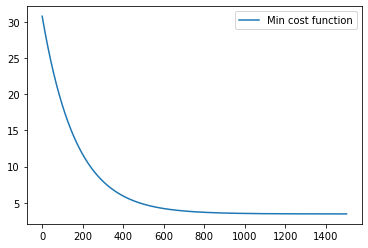

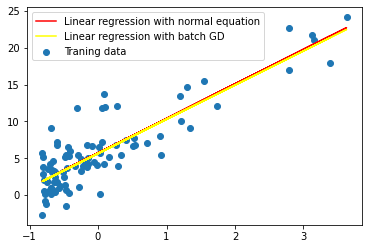

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#function to compute the cost function

def compute_cost_function(X, y, theta):
    #Number of example
    m = X.shape[0]
    return 1/(2*m)*np.sum((X.dot(theta.T)-y)**2)

#function to preprocessing data, a first step to make gradient descent work well
#You can using sklearn library to scale data or implement for yourself

def scale_feature(X):
    #transpose the matrix X
    X_trans = X.T
    #Numbef of features
    n = X.shape[1]
    for i in range(n):
        mean = np.mean(X_trans[i, :])
        std = np.std(X_trans[i, :])
        X_trans[i, :] = np.array([(x-mean)/std for x in X_trans[i, :]])
    return X_trans.T

#Find the coefficient using normal equation

def normal_equation(X, y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

#Find the coefficient using batch gradient descent 

def batch_gradient_descent(X, y, learning_rate, epochs):
    #Number of training samples
    m = X.shape[0]
    #Number of features include X0
    n = X.shape[1]
    #Init coefficient
    theta = np.zeros(n).reshape(1, -1)
    #Compute initial value of cost function
    J = compute_cost_function(X, y, theta)
    print('Initial cost :',J)
    #Variable for learning loop
    converged = False
    iter = 0
    previous_J = J
    min_J = [J]
    while not converged:
        grad = np.array([np.sum((X.dot(theta.T)-y)*X[:, j].reshape(-1, 1)) for j in range(n)])
        #simultaneously update coefficient
        theta = theta - learning_rate / m *grad
        J = compute_cost_function(X, y, theta)
        print('J :',J)
        if J <= 0.001 or iter == epochs:
            converged = True
            print('End of learning')
        min_J.append(J)
        previous_J = J
        iter += 1
    #Plot min cost function to choose proper learning rate
    plt.plot(min_J, label='Min cost function')
    plt.legend()
    plt.show()
    return theta

    
if __name__=='__main__':
    #Load data from directory 
    data = pd.read_csv('C:/CNTT/DATA/ex1data1.txt')
    #features 
    x = np.array(data.iloc[:,0]).reshape(-1, 1)
    #value
    y = np.array(data.iloc[:,1]).reshape(-1, 1)
    #Scale data 
    x = scale_feature(x)
    #Add one column as X0 feature
    X0 = np.ones(x.shape[0]).reshape(-1, 1)
    x = np.column_stack((X0,x))
    #Using normal equation
    theta = normal_equation(x, y)
    
    #Using batch gradient descent
    theta2 = batch_gradient_descent(x, y, 0.003, 1500)
    #Plot 
    predict_y2 = x.dot(theta2.T)
    plt.scatter(x[:,1], y, label='Traning data')
    predict_y1 = x.dot(theta)
    plt.plot(x[:,1], predict_y1, label='Linear regression with normal equation', color='red')
    plt.plot(x[:,1], predict_y2, label='Linear regression with batch GD', color='yellow')
    plt.legend()
    plt.show()